Import Python Libraries

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(10,5)})


Read CSV File

In [169]:
bank = pd.read_csv('Bank-Customers.csv')

View Sample Data

In [170]:
bank.head()

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79


Data Transformation

Add new field 'Full Name'

In [172]:
bank['Full_Name'] = bank['Name'] + ' ' + bank['Surname'] 

Add new field 'Month'

In [173]:
bank['Month'] = bank['Date Joined'].str.split('.', expand = True)[1]

View Data with New Fields

In [174]:
bank.head()

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,Full_Name,Month
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15,Simon Walsh,Jan
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73,Jasmine Miller,Jan
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83,Liam Brown,Jan
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52,Trevor Parr,Jan
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79,Deirdre Pullman,Jan


Data Analysis

Total no. of Customers

In [175]:
bank['Customer ID'].nunique()

4014

Customer Distribution by Region

Text(0, 0.5, 'No. of Customers')

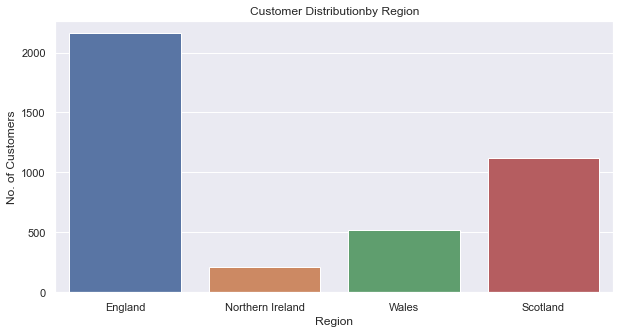

In [179]:
sns.countplot(x='Region', data=bank)

plt.title('Customer Distributionby Region')
plt.xlabel('Region')
plt.ylabel('No. of Customers')

Total Customers by Region and Job Classification

Text(0, 0.5, 'No. of Customers')

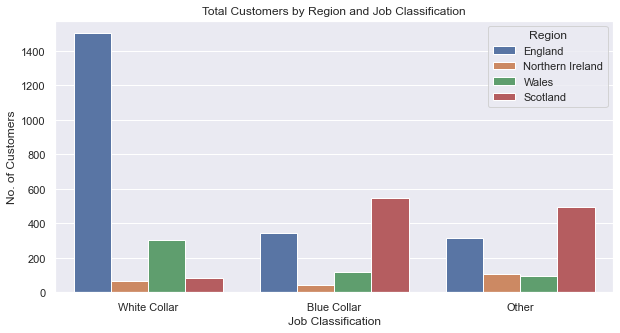

In [181]:
sns.countplot(x='Job Classification' ,data=bank, hue='Region')

plt.title('Total Customers by Region and Job Classification')
plt.xlabel('Job Classification')
plt.ylabel('No. of Customers')

Total Balance

In [4]:
bank['Balance'].sum()

159622523.37

Total Balance by Region

In [135]:
bank.groupby('Region')['Balance'].sum()

Region
England             84833397.00
Northern Ireland     8335566.39
Scotland            44410730.72
Wales               22042829.26
Name: Balance, dtype: float64

Highest Balances in each Region

In [149]:
bank.groupby('Region')['Balance'].max()

Region
England             183467.70
Northern Ireland    149698.12
Scotland            172085.48
Wales               145995.97
Name: Balance, dtype: float64

Balance Distribution

C:\Users\saleh.abdallah\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Balance Distribution')

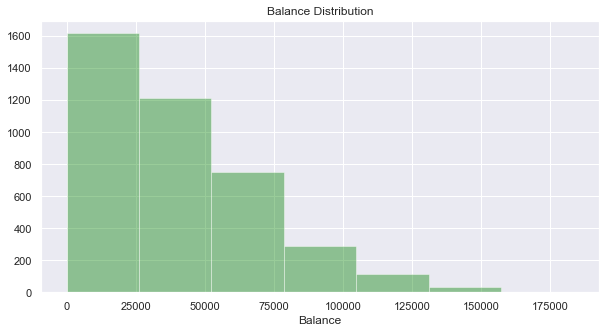

In [182]:
sns.distplot(bank['Balance'], kde= False, bins=7, color='green')

plt.title('Balance Distribution')

Customers with Balance Above 160k

In [162]:
bank[bank['Balance'] > 160000]

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,Full_Name,Month
1306,100001307,Dorothy,Jackson,Female,31,England,White Collar,22.Jul.15,183467.70,Dorothy Jackson,Jul
2009,200002010,Connor,North,Male,50,Scotland,Other,11.Sep.15,172085.48,Connor North,Sep
3449,100003450,Carl,Fraser,Male,35,England,White Collar,30.Nov.15,181680.99,Carl Fraser,Nov
3831,100003832,Sebastian,Arnold,Male,44,England,Blue Collar,20.Dec.15,161517.82,Sebastian Arnold,Dec


Customer with Balance Between 140k and 160k

In [161]:
bank[(bank['Balance'] > 140000) & (bank['Balance'] < 160000)]

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,Full_Name,Month
523,300000524,Brandon,Clark,Male,31,Wales,White Collar,16.May.15,145995.97,Brandon Clark,May
638,400000639,Peter,Miller,Male,28,Northern Ireland,White Collar,22.May.15,146569.77,Peter Miller,May
913,400000914,Anna,Randall,Female,25,Northern Ireland,Blue Collar,18.Jun.15,149698.12,Anna Randall,Jun
1501,200001502,Stewart,Vaughan,Male,57,Scotland,Blue Collar,03.Aug.15,141792.50,Stewart Vaughan,Aug
1785,100001786,Jan,Hunter,Female,28,England,White Collar,26.Aug.15,142461.87,Jan Hunter,Aug
1822,100001823,Natalie,Paige,Female,34,England,White Collar,28.Aug.15,149684.40,Natalie Paige,Aug
2334,300002335,Benjamin,Howard,Male,36,Wales,White Collar,27.Sep.15,144209.77,Benjamin Howard,Sep
2741,100002742,Alison,Manning,Female,30,England,White Collar,22.Oct.15,143808.39,Alison Manning,Oct
2821,100002822,Amelia,Morrison,Female,36,England,White Collar,26.Oct.15,143447.15,Amelia Morrison,Oct
3107,100003108,David,Metcalfe,Male,27,England,White Collar,11.Nov.15,146892.37,David Metcalfe,Nov


Customer Age Distribution 

C:\Users\saleh.abdallah\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Customer Age Distribution')

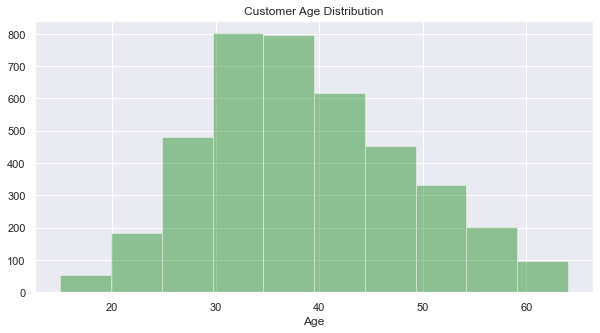

In [185]:
sns.distplot(bank['Age'], kde= False, bins=10, color='green')

plt.title('Customer Age Distribution')

Monthly Balance Trend

Text(0.5, 1.0, 'Total Balance by Month')

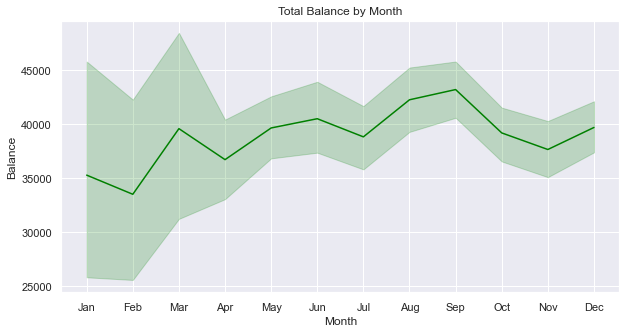

In [184]:
sns.lineplot(x='Month', y='Balance', data=bank, color='green')

plt.title('Total Balance by Month')